In [1]:
import librosa
import IPython
import music21 as mu
from midi2audio import FluidSynth

# update music21 environment so it can find MuseScore
mu.environment.set('musescoreDirectPNGPath', '/usr/bin/musescore')

# utility function for sound playback
def create_sound_file_from_midi(m21_data, file_name):
    m21_data.write('midi', fp = file_name + ".mid")
    fs = FluidSynth()
    fs.midi_to_audio('./' + file_name + ".mid", file_name + '.mp3')
    return(IPython.display.Audio("./" + file_name + ".mp3"))

In [2]:
mahler_ex = mu.converter.parse("./MidiFiles/MahlerSymphonies/symphony1/1st-movement-Langsam-Schleppend-Immer-sehr-gemachlich.mxl")

In [3]:
s = mu.corpus.parse('bwv66.6')

In [7]:
sChords = s.chordify()
sChords

<music21.stream.Part Soprano>

In [8]:
sFlat = sChords.flatten()
sFlat

<music21.stream.Part Soprano_flat>

In [9]:
sOnlyChords = sFlat.getElementsByClass('Chord')
sOnlyChords

<music21.stream.iterator.StreamIterator for Part:Soprano_flat @:0>

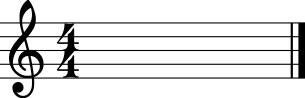

In [12]:
displayPart = mu.stream.Part(id = "displayPart")
displayPart.show()

In [17]:
def appendChordPairs(thisChord, nextChord):
    if ((thisChord.isTriad() is True or
            thisChord.isSeventh() is True) and
                thisChord.root().name == 'A'):
        closePositionThisChord = thisChord.closedPosition(forceOctave=4)
        closePositionNextChord = nextChord.closedPosition(forceOctave=4)

        m = mu.stream.Measure()
        m.append(closePositionThisChord)
        m.append(closePositionNextChord)
        displayPart.append(m)

In [18]:
for i in range(len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    appendChordPairs(thisChord, nextChord)

In [19]:
displayPart

<music21.stream.Part displayPart>

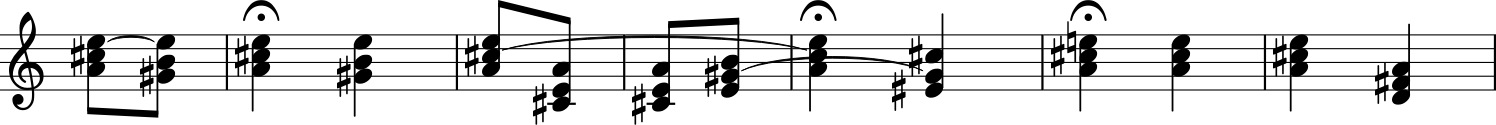

In [20]:
displayPart.show()

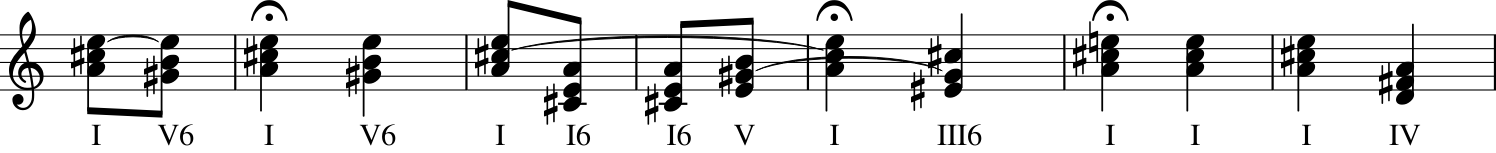

In [23]:
keyA = mu.key.Key('A')
for c in displayPart.recurse().getElementsByClass('Chord'):
    rn = mu.roman.romanNumeralFromChord(c, keyA)
    c.addLyric(str(rn.figure))

displayPart.show()

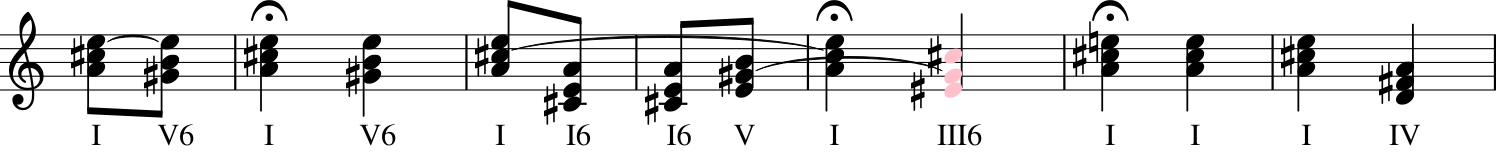

In [24]:
for c in displayPart.recurse().getElementsByClass('Chord'):
    if c.lyric == 'III6':
        c.style.color = 'pink'
        for x in c.derivation.chain():
            x.style.color = 'pink'

displayPart.show()

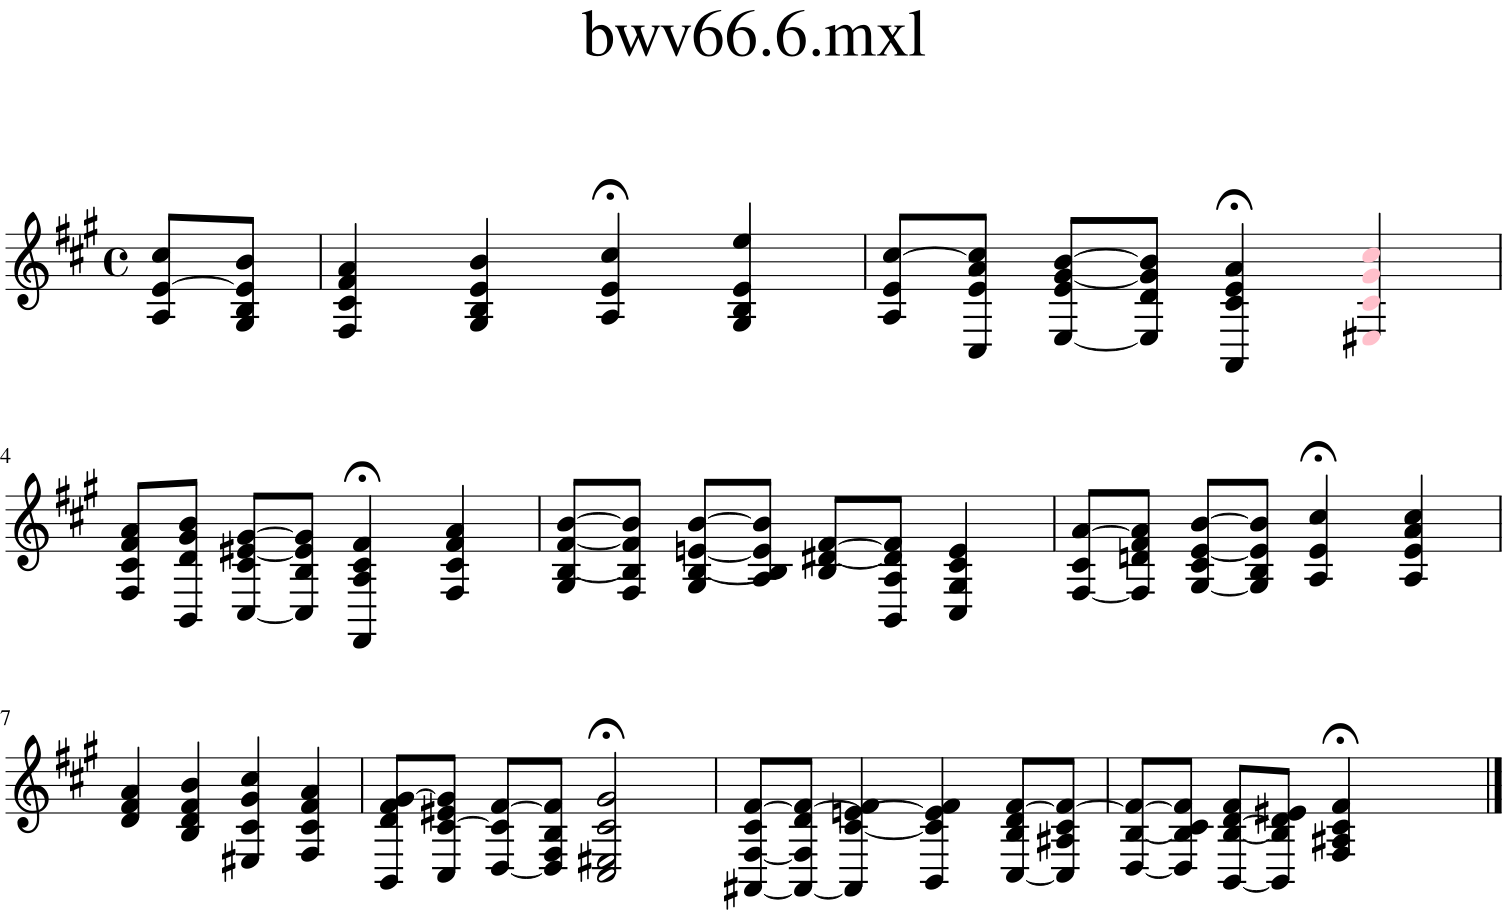

In [25]:
sChords.show()

In [26]:
for m in sChords.getElementsByClass('Measure'):
    k = m.analyze('key')
    print(m.number, k)

0 E major
1 E major
2 A major
3 f# minor
4 E major
5 A major
6 f# minor
7 C# major
8 F# major
9 b minor


In [28]:
coreCorpus = mu.corpus.corpora.CoreCorpus()
len(coreCorpus.getPaths())

3189

In [29]:
sixEight = mu.corpus.search('6/8')

In [30]:
sixEight

<music21.metadata.bundles.MetadataBundle {2163 entries}>

In [31]:
bachBundle = mu.corpus.search('bach', 'composer')
bachBundle

<music21.metadata.bundles.MetadataBundle {363 entries}>

In [33]:
for field in mu.corpus.manager.listSearchFields():
    print(field)

actNumber
alternativeTitle
ambitus
associatedWork
collectionDesignation
commission
composer
copyright
countryOfComposition
date
dedication
groupTitle
keySignatureFirst
keySignatures
localeOfComposition
movementName
movementNumber
noteCount
number
numberOfParts
opusNumber
parentTitle
pitchHighest
pitchLowest
popularTitle
quarterLength
sceneNumber
sourcePath
tempoFirst
tempos
textLanguage
textOriginalLanguage
timeSignatureFirst
timeSignatures
title
volume


In [37]:
n = mu.pitch.Pitch("A-2")
isinstance(n, mu.base.Music21Object)

False

In [40]:
n = mu.note.Note('A-2', type='half')
'Music21Object' in n.classes

True

In [42]:
s = mu.stream.Stream()
s.append(mu.clef.TrebleClef())
s.append(mu.meter.TimeSignature('3/4'))
s.append(mu.note.Note("A"))
s.append(mu.note.Rest())
s.append(mu.note.Note("B"))

for element in s.getElementsByClass('Note'):
    print(element)

<music21.note.Note A>
<music21.note.Note B>


In [43]:
for element in s.getElementsByClass(['Note', 'Rest']):
    print(element)

<music21.note.Note A>
<music21.note.Rest quarter>
<music21.note.Note B>


In [45]:
r = mu.note.Rest()
r.classSet

frozenset({music21.base.Music21Object,
           music21.note.GeneralNote,
           music21.note.Rest,
           music21.prebase.ProtoM21Object,
           object,
           'GeneralNote',
           'Music21Object',
           'ProtoM21Object',
           'Rest',
           'builtins.object',
           'music21.base.Music21Object',
           'music21.note.GeneralNote',
           'music21.note.Rest',
           'music21.prebase.ProtoM21Object',
           'object'})

In [47]:
# random assigned ID
n = mu.note.Note("C#4")
n.id

139692019265792

In [48]:
n.id = 'first_note'
n.id

'first_note'

In [50]:
# labelling 
s = mu.stream.Stream()
s.id = 'empty_stream'
s

<music21.stream.Stream empty_stream>

In [52]:
bach = mu.corpus.parse('bwv66.6')
sopr = bach.parts['soprano']
sopr

<music21.stream.Part Soprano>

In [54]:
# groups are labels for object
n.groups

n.groups.append('black_key')
n.groups.append('sharped')
n.groups

['black_key', 'sharped']

In [55]:
ryans = mu.corpus.search('ryansMammoth')
ryans

<music21.metadata.bundles.MetadataBundle {1059 entries}>

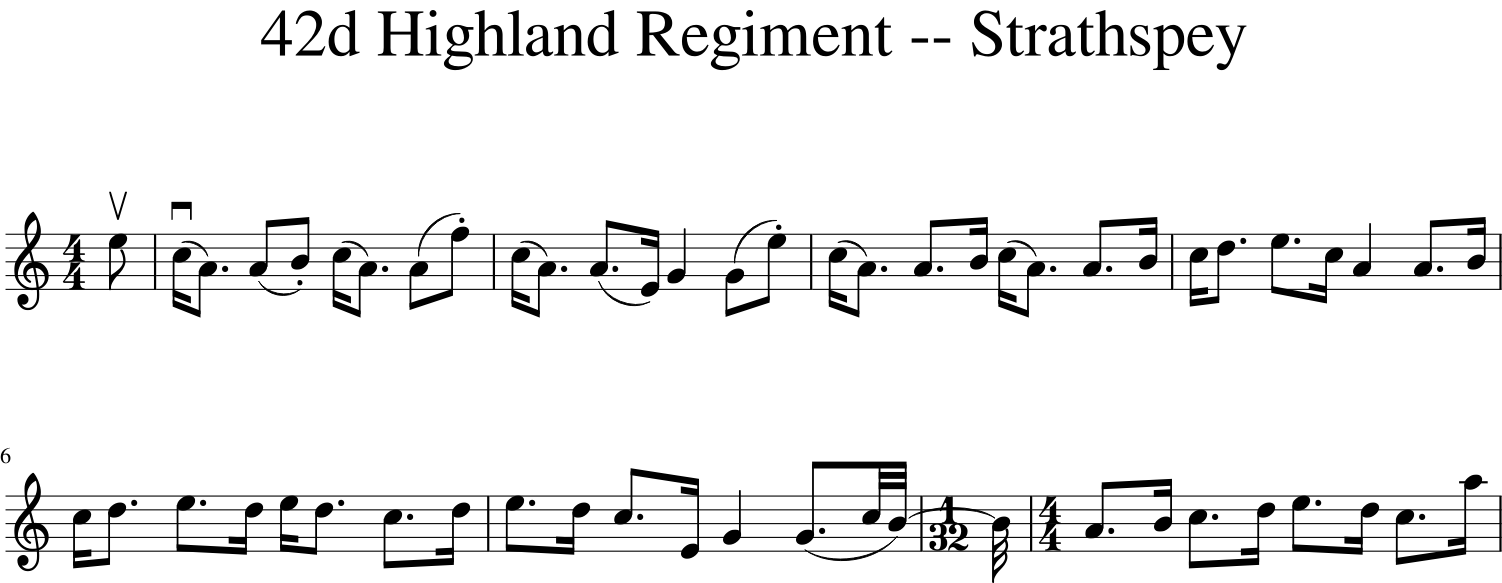

In [57]:
highland = ryans.search('Highland Regiment')
highland
highlandParsed = highland[0].parse()
highlandParsed.measures(0, 8).show()

In [58]:
highlandIterator = highlandParsed.recurse()
highlandSlurs = highlandIterator.getElementsByClass('Slur')

higher = 0
lower = 0
same = 0 # could happen for slurs longer than 2 notes

for sl in highlandSlurs:
    firstNote = sl.getFirst()
    lastNote = sl.getLast()
    psDiff = lastNote.pitch.ps - firstNote.pitch.ps
    if psDiff > 0:
        higher += 1
    elif psDiff < 0:
        lower += 1
    else:
        same += 1

In [59]:
(higher, lower, same)

(19, 30, 0)

In [60]:
from statistics import mean
from collections import Counter

totalCounter = Counter()

def countOneSlur(sl, totalCounter):
    firstNote = sl.getFirst()
    lastNote = sl.getLast()
    if not hasattr(firstNote, 'pitches'):
        return
    if not hasattr(lastNote, 'pitches'):
        return

    firstNotePs = mean(p.ps for p in firstNote.pitches)
    lastNotePs = mean(p.ps for p in lastNote.pitches)
    psDiff = lastNotePs - firstNotePs
    if psDiff > 0:
        totalCounter['higher'] += 1
    elif psDiff < 0:
        totalCounter['lower'] += 1
    else:
        totalCounter['same'] += 1

In [61]:
bostonMD = ryans.search('The Boston -- Reel')
bostonMD

<music21.metadata.bundles.MetadataBundle {1 entry}>

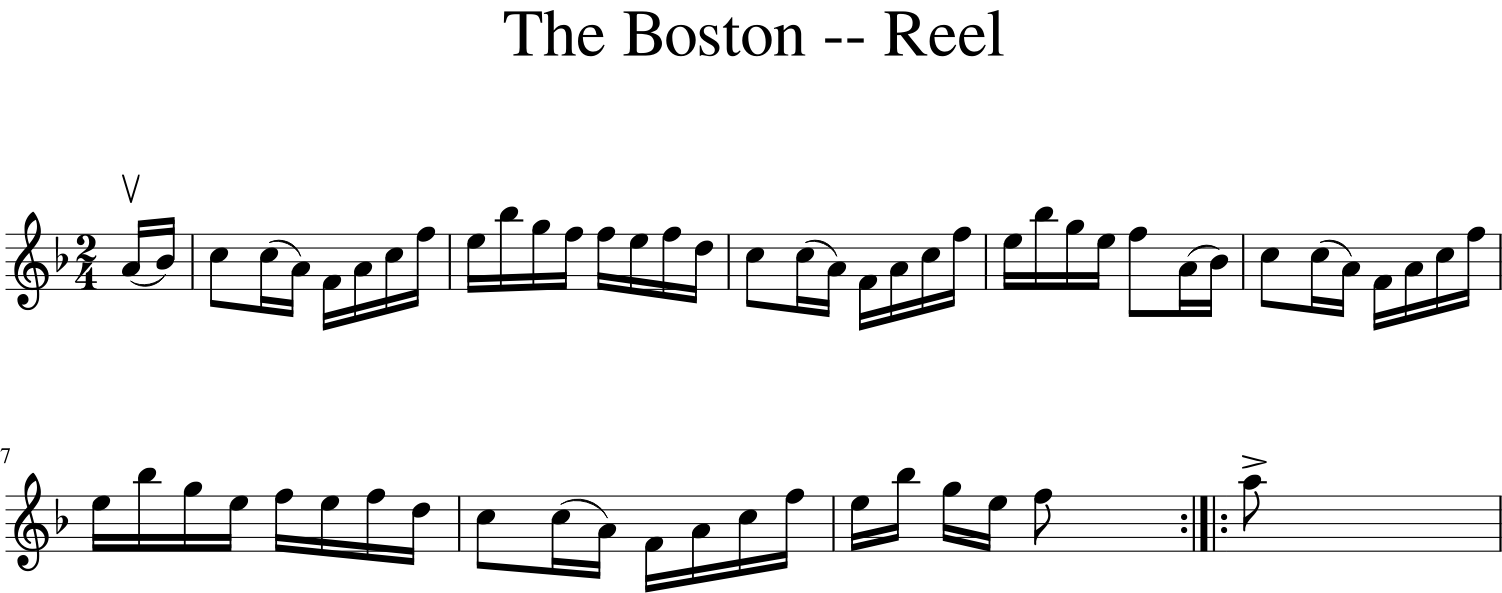

In [62]:
boston = bostonMD[0].parse()
boston.measures(0, 9).show()

In [63]:
lamb1 = mu.corpus.parse('palestrina/agnus_I_01', forceSource=True)

In [66]:
justTheNotes = lamb1.recurse().notes
searchList = [mu.note.Note(type='whole'), mu.note.Note(type='whole'), mu.note.Note(type='whole')]

mu.search.rhythmicSearch(justTheNotes,
                      searchList)

[0, 107, 108, 189, 216, 217, 243, 251, 302, 303, 324]